# Load Data


In [1]:
#conectividadesdedaniel
FILEID = "1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O connectividades_daniel.zip && rm -rf /tmp/cookies.txt
!dir
!unzip connectividades_daniel.zip

--2021-01-18 01:14:02--  https://docs.google.com/uc?export=download&confirm=&id=1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch
Resolving docs.google.com (docs.google.com)... 172.217.164.142, 2607:f8b0:4004:814::200e
Connecting to docs.google.com (docs.google.com)|172.217.164.142|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-70-docs.googleusercontent.com/docs/securesc/jltsmcfjkfq5ob69mt66h0v3gqqebe26/p13hj2um7b6af3t5njfq4jqgumqnn3c9/1610932425000/17600740636788319470/08876523859412435364Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download [following]
--2021-01-18 01:14:03--  https://doc-0c-70-docs.googleusercontent.com/docs/securesc/jltsmcfjkfq5ob69mt66h0v3gqqebe26/p13hj2um7b6af3t5njfq4jqgumqnn3c9/1610932425000/17600740636788319470/08876523859412435364Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download
Resolving doc-0c-70-docs.googleusercontent.com (doc-0c-70-docs.googleusercontent.com)... 172.217.164.129, 2607:f8b0:4004:814::2001
Connecting to doc-0c

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from time import time
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr
from scipy.stats import pearsonr

from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd

from sklearn.model_selection import LeaveOneOut
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


# cargar Red

In [3]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
class SMRfeat(BaseEstimator, TransformerMixin):
  def __init__(self):
    self

  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):   
      
          
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):
      self.fit(Xepochs)
      return self.transform(Xepochs)   
class SMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)

    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])

    #concat
    concat = tf.keras.layers.concatenate(hiddens,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)

    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(hfi) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    self.plot_history_acc_w()
  def predict(self, X, *_):
    return  self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return

# prueba de red sin montecarlo

In [ ]:
##cargar conectividad
conect_PLV= pickle.load( open( "connectividad_daniel_phy_2bandas.pickle", "rb" ) )[:,:,:,0]

## definir target y cargar datos
##cargar datos csp e indx
load = pickle.load( open( "/content/drive/MyDrive/CX_Regression/codigos/physionet/targets_physionet/target_phy_2seg_5time_2frec.p", "rb" ) )
indx = load['indx']
indx2=[int(indx[i][1::]) for i in range(len(indx))]
### fix target 
target = np.asarray(load['acc_subj'])

mea = target[np.argsort(indx2)]


sc_ma = MinMaxScaler(feature_range=(-1,1))

zpca =sc_ma.fit_transform(mea.reshape(-1, 1))

#indx = np.arange(1,106)

In [ ]:
mea.shape

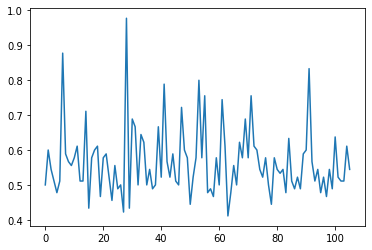

In [ ]:
plt.plot(mea)
#plt.plot(load['acc_subj'])

In [ ]:
array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

105
(105, 1)
(105, 2016, 2)
(105, 2016, 2)


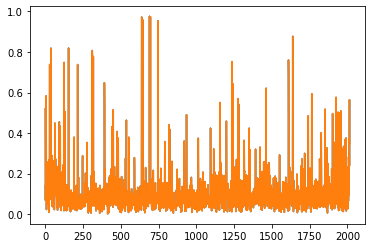

In [ ]:
############ rendimiento por sujeto

connectividad= conect_PLV
connectividad.shape
indx = np.arange(0,len(connectividad))
clases = [[0,1,2]]

#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
tipos = [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

for clase in clases:        
  newindx = []
  for i in range(len(tipos)):
    if tipos[i]==clase[0] or tipos[i]==clase[1] or tipos[i]==clase[2]:
      newindx+= [indx[i]]
  print(len(newindx))

  ########################
  newmea = []
  for i in range(len(tipos)):
    if tipos[i]==clase[0] or tipos[i]==clase[1] or tipos[i]==clase[2]:
      if i<103:
        newmea+= [zpca[i]]
      else:
        newmea+= [zpca[i+1]]
  len(newmea)
  newmea= np.array(newmea)
  print(newmea.shape)
  ###########################################

  xtensor = []
  
  for i in newindx:
    try:
      subjs = connectividad[i,:,:]
      xtensor+=[subjs]
    except:
      print('s'+str(i))
  xtensor= np.asarray(xtensor)
  print(xtensor.shape)
  



  X=xtensoractual
  y = newmea 
  steps = [('smrfeat', SMRfeat()), 
            ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

  pipeline = Pipeline(steps)
  #ypred = pipeline.fit_predict(X_raw,zpca)
  ypred = cross_val_predict(pipeline,X,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)
  _, _, r_value, p_value, _ = linregress(y.reshape(-1),ypred.reshape(-1))
  print( r_value ,p_value )
  scm = MinMaxScaler()
  print(pearsonr(y.reshape(-1), ypred.reshape(-1)))
  print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(y), scm.fit_transform(ypred[:,0,0]))))
  print('mean_absolute_error', mean_absolute_error(scm.fit_transform(y), scm.fit_transform(ypred)))


# montecarlo

## cargar red


In [4]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr, pearsonr


from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd

from sklearn.model_selection import LeaveOneOut
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from time import time


In [5]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
        
class SMRfeat(BaseEstimator, TransformerMixin):
  def __init__(self):
    self
      
  
  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]


      
      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):   
      
          
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):
      self.fit(Xepochs)
      return self.transform(Xepochs)   
class SMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1,droprate=0.2,Mc_iter=100,alpha_dropout=True,plot_hst = False):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
        self.droprate = droprate
        self.Mc_iter = Mc_iter
        self.alpha_dropout = alpha_dropout
        self.plot_hst = plot_hst
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)
    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    drop_1 = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])
        if self.alpha_dropout:
            drop_1[i] = tf.keras.layers.AlphaDropout(self.droprate,seed=seed)(hiddens[i])
        else:
            drop_1[i] = tf.keras.layers.Dropout(self.droprate)(hiddens[i])
    #concat
    concat = tf.keras.layers.concatenate(drop_1,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)
    if self.alpha_dropout:
        drop_2 = tf.keras.layers.AlphaDropout(rate=self.droprate,seed=seed)(hfi)
    else:
        drop_2 = tf.keras.layers.Dropout(rate=self.droprate)(hfi)
    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(drop_2) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    if self.plot_hst:
        self.plot_history_acc_w()
  def predict(self, X, *_):
    return np.stack([self.model_fun(X,training=True) for sample in range(self.Mc_iter)])#self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return


In [6]:
def split_loo(X,y,indx):
    X_test = np.expand_dims(X[indx,:,:],axis=0)
    y_test = y[indx,:]
    X_train = np.delete(X,indx,axis=0)
    y_train = np.delete(y,indx,axis=0)
    return X_train,y_train,X_test,y_test

def fit_predict_Mc_dropout(X,y,verbose=True):
    y_pred = X.shape[0]*[None]
    t = 0
    for i in range(X.shape[0]):
        ti = time()

        X_train,y_train,X_test,y_test = split_loo(X,y,i)
        
        mdl = Pipeline([
            ('Feats',SMRfeat()),
            ('SRMDNN',SMRDNN(verbose=0,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,alpha_dropout=False))
        ])

        mdl.fit(X_train,y_train)
        y_pred[i] = mdl.predict(X_test).ravel()

        te = time()
        t+=te-ti
        if verbose:
            print("iter: "+str(i+1)+" of "+str(X.shape[0])+" ====> elapsed time: "+str((te-ti)/60)+" min")
    
    print("\nTotal time = "+str(t/60)+" min")

    y_pred = np.asarray(y_pred)
    return y_pred

def plot_regression(y,y_pred):
    scm = MinMaxScaler()

    ypred = np.mean(y_pred,axis=1).reshape(-1,1)
    std_y = np.std(scm.fit_transform(y_pred),axis=1)

    XX = scm.fit_transform(y)
    YY = scm.fit_transform(-ypred)
    
    _, _, r_value, p_value, _ = linregress(XX.reshape(-1),YY.reshape(-1))

    #indx = np.arange(1,len(grafos)+1)

    regr = linear_model.LinearRegression()
    regr.fit(XX.reshape(-1,1),YY.reshape(-1,1))
    lrpred = regr.predict(XX.reshape(-1,1))
    #plt.figure(figsize=(16,9))
    #xx = np.linspace(XX.min(),XX.max(),XX.shape[0])
    #yy = np.linspace(YY.min(),YY.max(),XX.shape[0])
    #plt.plot(xx,yy)
    #plt.fill_between(xx.ravel(),yy.ravel()+0.95*std_y,yy.ravel()-0.95*std_y,color="b",alpha=0.2)
    #plt.scatter(XX,YY,c=acc_m)

    #for i in range(XX.shape[0]):
    #    plt.text(XX[i],YY[i],indx[i])
    #plt.xlabel('Accuracy')
    #plt.ylabel('FCx Predictor')
    #plt.title('r=%.2f '%abs(r_value))
    #plt.colorbar()
    #plt.show()

    print('r_value', abs(r_value))
    print('p_value',p_value)
    print('mean_squared_error', np.sqrt(mean_squared_error(XX,YY)))
    print('mean_absolute_error', mean_absolute_error(XX,YY))
    
    return abs(r_value),p_value,np.sqrt(mean_squared_error(XX,YY)),mean_absolute_error(XX,YY)

## montecarlo por tipos

In [ ]:
##cargar conectividad
conect_PLV= pickle.load( open( "connectividad_daniel_phy_2bandas.pickle", "rb" ) )[:,:,:,0]

## definir target y cargar datos
##cargar datos csp e indx
load = pickle.load( open( "/content/drive/MyDrive/CX_Regression/codigos/physionet/targets_physionet/target_phy_2seg_5time_2frec.p", "rb" ) )
indx = load['indx']
indx2=[int(indx[i][1::]) for i in range(len(indx))]
### fix target 
target = np.asarray(load['acc_subj'])

mea = target[np.argsort(indx2)]


sc_ma = MinMaxScaler(feature_range=(-1,1))

zpca =sc_ma.fit_transform(mea.reshape(-1, 1))

#indx = np.arange(1,106)

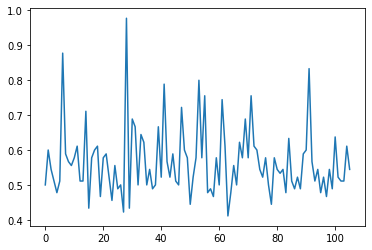

In [ ]:
plt.plot(mea)

In [ ]:
mea[6]

0.8777777777777777

In [ ]:
all_grafos = conect_PLV
tipos = [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]



clases = [[0,None, None],[1,None, None],[2,None, None],[0,1, 2]]




for tipe in clases:
    

  ######################## target, se quita el sujeto 104
  newmea = []
  for i in range(len(tipos)):
    if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
      if i<103:
        newmea+= [zpca[i]]
      else:
        newmea+= [zpca[i+1]]
  len(newmea)
  newmea= np.array(newmea)
  print('newmea:', newmea.shape)
  ###########################################

  xtensoractual=[]

  for i in range(len(tipos)):
    if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
      xtensoractual+=[all_grafos[i,:,:]]
  xtensoractual=np.array(xtensoractual)
  print(xtensoractual.shape)

  X = xtensoractual
  y = newmea    
  ypred= fit_predict_Mc_dropout(X,y,verbose=True)
  r_value, p_value,mse,mae= plot_regression(y,ypred)

51
newmea: (51, 1)
(51, 2016, 2)
iter: 1 of 51 ====> elapsed time: 0.2756392598152161 min
iter: 2 of 51 ====> elapsed time: 0.2706027348836263 min
iter: 3 of 51 ====> elapsed time: 0.2746483524640401 min
iter: 4 of 51 ====> elapsed time: 0.2706292907396952 min
iter: 5 of 51 ====> elapsed time: 0.27640207211176554 min
iter: 6 of 51 ====> elapsed time: 0.27152750492095945 min
iter: 7 of 51 ====> elapsed time: 0.27334370613098147 min
iter: 8 of 51 ====> elapsed time: 0.27552569707234703 min
iter: 9 of 51 ====> elapsed time: 0.273537802696228 min
iter: 10 of 51 ====> elapsed time: 0.2719620943069458 min
iter: 11 of 51 ====> elapsed time: 0.2742719610532125 min
iter: 12 of 51 ====> elapsed time: 0.26966771682103474 min
iter: 13 of 51 ====> elapsed time: 0.27335491180419924 min
iter: 14 of 51 ====> elapsed time: 0.2743975599606832 min
iter: 15 of 51 ====> elapsed time: 0.2730486035346985 min
iter: 16 of 51 ====> elapsed time: 0.2707759420077006 min
iter: 17 of 51 ====> elapsed time: 0.277232

## tres bandas de frecuencia plv montecarlo


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
##cargar conectividad
conect_PLV= pickle.load( open( "connectividad_daniel_phy_3bandas.pickle", "rb" ) )[:,:,:,0]

## definir target y cargar datos
##cargar datos csp e indx
load = pickle.load( open( "/content/drive/MyDrive/CX_Regression/codigos/physionet/targets_physionet/target_phy_2seg_5time_2frec.p", "rb" ) )
indx = load['indx']
indx2=[int(indx[i][1::]) for i in range(len(indx))]
### fix target 
target = np.asarray(load['acc_subj'])

mea = target[np.argsort(indx2)]
sc_ma = MinMaxScaler(feature_range=(-1,1))
zpca =sc_ma.fit_transform(mea.reshape(-1, 1))


In [15]:
all_grafos = conect_PLV
tipos = [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
clases = [[0,None, None],[1,None, None],[2,None, None],[0,1, 2]]
for tipe in clases:
    

  ######################## target, se quita el sujeto 104
  newmea = []
  for i in range(len(tipos)):
    if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
      if i<103:
        newmea+= [zpca[i]]
      else:
        newmea+= [zpca[i+1]]
  len(newmea)
  newmea= np.array(newmea)
  print('newmea:', newmea.shape)
  ###########################################

  xtensoractual=[]

  for i in range(len(tipos)):
    if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
      xtensoractual+=[all_grafos[i,:,:]]
  xtensoractual=np.array(xtensoractual)
  print(xtensoractual.shape)

  X = xtensoractual
  y = newmea    
  ypred= fit_predict_Mc_dropout(X,y,verbose=True)
  r_value, p_value,mse,mae= plot_regression(y,ypred)

newmea: (51, 1)
(51, 2016, 3)
iter: 1 of 51 ====> elapsed time: 0.5187984585762024 min
iter: 2 of 51 ====> elapsed time: 0.3960179090499878 min
iter: 3 of 51 ====> elapsed time: 0.395457923412323 min
iter: 4 of 51 ====> elapsed time: 0.3942002495129903 min
iter: 5 of 51 ====> elapsed time: 0.39549365441004436 min
iter: 6 of 51 ====> elapsed time: 0.3924837946891785 min
iter: 7 of 51 ====> elapsed time: 0.38936853408813477 min
iter: 8 of 51 ====> elapsed time: 0.39571213722229004 min
iter: 9 of 51 ====> elapsed time: 0.38884652058283486 min
iter: 10 of 51 ====> elapsed time: 0.38321139017740885 min
iter: 11 of 51 ====> elapsed time: 0.3845508058865865 min
iter: 12 of 51 ====> elapsed time: 0.38725520769755045 min
iter: 13 of 51 ====> elapsed time: 0.38543633222579954 min
iter: 14 of 51 ====> elapsed time: 0.3814149578412374 min
iter: 15 of 51 ====> elapsed time: 0.38312657276789347 min
iter: 16 of 51 ====> elapsed time: 0.3826647917429606 min
iter: 17 of 51 ====> elapsed time: 0.3821671

## prueba target viejo

In [7]:
FILEID = "1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O grafos_suxchaxfre.zip && rm -rf /tmp/cookies.txt
!dir
!unzip grafos_suxchaxfre.zip

--2021-01-18 01:14:23--  https://docs.google.com/uc?export=download&confirm=&id=1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV
Resolving docs.google.com (docs.google.com)... 172.217.164.142, 2607:f8b0:4004:814::200e
Connecting to docs.google.com (docs.google.com)|172.217.164.142|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-9s-docs.googleusercontent.com/docs/securesc/406fvq3ee51fkvse96llok0m9bm1jd8u/td9b972kgih9nk5hpo43q257ov71o8g8/1610932425000/17600740636788319470/00791945848994012423Z/1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV?e=download [following]
--2021-01-18 01:14:24--  https://doc-08-9s-docs.googleusercontent.com/docs/securesc/406fvq3ee51fkvse96llok0m9bm1jd8u/td9b972kgih9nk5hpo43q257ov71o8g8/1610932425000/17600740636788319470/00791945848994012423Z/1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV?e=download
Resolving doc-08-9s-docs.googleusercontent.com (doc-08-9s-docs.googleusercontent.com)... 172.217.164.129, 2607:f8b0:4004:814::2001
Connecting to doc-08

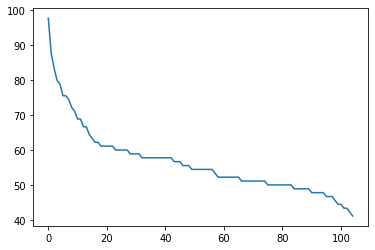

In [8]:
### fix target 

mea = pickle.load( open( "phy_y.pickle", "rb" ) )
sc_ma = MinMaxScaler(feature_range=(-1,1))
zpca =sc_ma.fit_transform(mea.reshape(-1, 1))

#indx = np.arange(1,106)
mea = pickle.load( open( "phy_y.pickle", "rb" ) )
plt.plot(mea)

In [9]:
##cargar conectividad
conect_PLV= pickle.load( open( "connectividad_daniel_phy_2bandas.pickle", "rb" ) )[:,:,:,0]
all_grafos = conect_PLV
tipos = [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]#[1 2 3]

clases = [[0,None,None], [1,None,None], [2,None,None],[0,1,2]]

for tipe in clases:
    #seleccion de index por clase de sujetos
    newindx = []
    for i in range(len(tipos)):
      if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
        newindx += [indx[i]]
    print(len(newindx))

    newzpca=[]
    #dimensionar y
    for i in range(len(tipos)):
      if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
        newzpca.append(zpca[i][0])        
    newzpca= np.array(newzpca)
    newzpca= newzpca.reshape(-1,1)
    print(newzpca.shape)


    xtensoractual=[]

    for i in range(len(tipos)):
      if tipos[i]==tipe[0] or tipos[i]==tipe[1] or tipos[i]==tipe[2]:
        xtensoractual+=[all_grafos[i,:,:]]
    xtensoractual=np.array(xtensoractual)
    print(xtensoractual.shape)
    
    
    #red montecarlo
    X = xtensoractual
    y = newzpca
    print(X.shape,y.shape)
    y_pred = fit_predict_Mc_dropout(X,y,verbose=True)
    r_value, p_value,mse,mae= plot_regression(y,y_pred)

NameError: ignored